# Five-minute quickstart

In this quickstart, you will:

- Create some jobs.
- Use the jobs in a Flow.
- Run the Flow.
- Examine the outputs of the Flow.
- Get a flavor of the Python API

This tutorial will emphasize "hands-on" usage of jobflow and not explain things in detail.

## Define jobs

The atomic building block of jobflows are jobs. Creating a job is as easy as writing a python function. All you need to do is use the `@job` decorator.

In [ ]:
import warnings
warnings.filterwarnings("ignore", "Using `tqdm.autonotebook.tqdm`")

In [2]:
from jobflow import job

@job
def add(a, b):
    return a + b

Any call to the `add` function will return a `Job` object. This is essentially a function call that will be executed later.

In [3]:
add_first = add(1, 5)

Jobs have outputs that can be accessed using the `output` attribute. As the job has not yet been executed, the output is currently a reference to the future output.

In [4]:
add_first.output

OutputReference(3bc98d5e-b593-4ad1-a409-cef9136bb835)

The output of a job can be used as the input to another job.

In [5]:
add_second = add(add_first.output, 3)

## Create a Flow

A Flow is a collection of Jobs or other Flow objects. Let's create a Flow from the `add_first` and `add_second` jobs we just made:

In [6]:
from jobflow import Flow

flow = Flow([add_first, add_second])

The order of the jobs in the input array does not matter. Their execution order will be determined by their connectivity. Because `add_second` takes the output of `add_first` as an input, the `add_first` will always run before `add_second`.

The connectivity of the jobs in a flow can be visualized using:

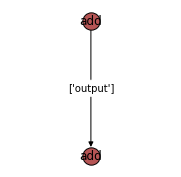

In [7]:
flow.draw_graph(figsize=(3, 3)).show()

## Run the Flow

Jobflow supports running Flows locally or on remote clusters. Below we run the Flow locally using the `run_locally` function.

<div class="alert alert-info">
**Note**
<p>Running Flows on remote clusters can be achieved using the FireWorks package and is covered in the [Running Flows with FireWorks tutorial](https://hackingmaterials.lbl.gov/jobflow/tutorials/6-fireworks.html).</p>
</div>

In [8]:
from jobflow.managers.local import run_locally

responses = run_locally(flow)

2021-06-04 17:56:25,875 INFO Started executing jobs locally
2021-06-04 17:56:25,877 INFO Starting job - add (3bc98d5e-b593-4ad1-a409-cef9136bb835)
2021-06-04 17:56:25,878 INFO Finished job - add (3bc98d5e-b593-4ad1-a409-cef9136bb835)
2021-06-04 17:56:25,879 INFO Starting job - add (846add3f-1d37-47a1-a7f5-94a0fdf57b1b)
2021-06-04 17:56:25,880 INFO Finished job - add (846add3f-1d37-47a1-a7f5-94a0fdf57b1b)
2021-06-04 17:56:25,881 INFO Finished executing jobs locally


The numbers in brackets after the job function name give the job unique identifier (UUID).

## Examine Flow outputs

The `run_locally` function returns the output of all jobs. The the format of the output is:

```python
{
    job_uuid: {
        job_index: {
            Response()
        }
    }
}
```

The `job_index` and `Response()` objects are introduced in later tutorials. The main thing to know is that the Response contains the output of the Job and any other commands for controlling the Flow execution.

In [9]:
responses

{'3bc98d5e-b593-4ad1-a409-cef9136bb835': {1: Response(output=6, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)},
 '846add3f-1d37-47a1-a7f5-94a0fdf57b1b': {1: Response(output=9, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)}}

We can check the output of specific jobs using:

In [10]:
responses[add_first.uuid][1].output

6

## Next steps

Now that you’ve successfully run your first Flow, we encourage you to learn about all the different options jobflow provides for designing and running workflows. A good next step is the [Introductory tutorial](https://hackingmaterials.lbl.gov/jobflow/tutorials/2-introduction.html), which covers things more slowly than this quickstart.